In [1]:
import numpy as np
import time
import math
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import cPickle as pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.cross_validation import cross_val_score, KFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn import neighbors
import random
%matplotlib inline 

In [18]:
#a = pd.read_csv('/Users/xidexia/Desktop/eros.csv',index_col=0)
#a = pd.read_csv('/Users/xidexia/Desktop/299/log/readdata/cost_data_69.csv',index_col=0)
a = pd.read_csv('/Users/xidexia/Desktop/299/try code/neweros_radec_0921.csv',index_col=0)

a = a.dropna()
a.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_mean,CAR_sigma,CAR_tau,Color,Con,Eta_color,...,Std,StetsonJ,StetsonK,StetsonK_AC,StetsonL,Class,ID,RA,DEC,Mean Cost
0,0.08050,0.970881,1,0.283154,9.267645,0.041813,1.666029,0.216444,0,1825.803969,...,0.042416,1.523566,0.771010,0.778637,1.028974,1,lm0130l6047,69.87755,-69.23043,1.722083e-17
1,0.08175,1.000000,1,0.373134,53.154938,-0.114116,0.285270,0.392090,0,1458.708884,...,0.048401,2.543096,0.798770,0.895945,1.989471,1,lm0134k12896,69.97069,-69.83198,3.438798e-17
2,0.21475,0.992923,1,0.351852,44.787867,-0.284283,0.342989,0.470022,0,21.576843,...,0.119282,6.404891,0.780489,0.827161,4.771433,1,lm0132l17797,70.21114,-69.73800,2.095067e-17
3,0.26200,1.000000,1,0.432886,59.326615,-0.439332,0.270492,0.396497,0,86.998066,...,0.162663,9.669899,0.842464,0.900790,8.213023,1,lm0130k10679,70.22697,-69.11522,3.773741e-18
4,0.36800,1.000000,1,0.281250,51.809591,-0.561831,0.333611,0.428027,0,207.132016,...,0.231979,12.127501,0.843455,0.892794,9.736694,1,lm0132n12162,70.36245,-69.63182,1.713454e-19


In [19]:
a.shape

(8317, 69)

In [21]:
features = a.columns[0:64]
Y_all = np.array([int(a['Class'][i]) for i in xrange(8317  )])

(array([  829.,  1500.,  1114.,     0.,  1500.,  1500.,     0.,   251.,
         1500.,   123.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

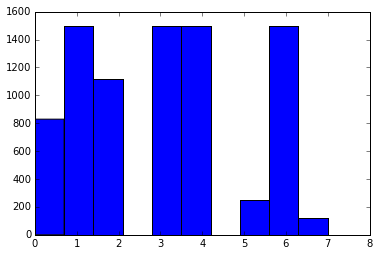

In [22]:
plt.hist(Y_all)

In [23]:
X_all = np.array(a)

In [24]:
X_all.shape

(8317, 69)

In [25]:
Xr, Xt, yr, yt = train_test_split(X_all, Y_all, train_size=6000, test_size=2317, random_state=42)
Xinit, Xsearch, yinit, ysearch = train_test_split(Xr, yr, train_size=20, test_size=2397, random_state=42)

Xinit_copy = Xinit
Xsearch_copy = Xsearch
Xr_copy = Xr
Xt_copy = Xt

yinit_copy = yinit
ysearch_copy = ysearch
yr_copy = yr
yt_copy = yt


In [26]:
Xr, Xt, yr, yt = train_test_split(X_all, Y_all, train_size=2000, test_size=1057, random_state=42)
Xinit, Xsearch, yinit, ysearch = train_test_split(Xr, yr, train_size=20, test_size=1037, random_state=42)

Xinit_copy = Xinit
Xsearch_copy = Xsearch
Xr_copy = Xr
Xt_copy = Xt

yinit_copy = yinit
ysearch_copy = ysearch
yr_copy = yr
yt_copy = yt


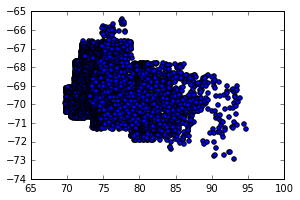

In [27]:
plt.figure(figsize = [10,3])
plt.subplot(1,2,1)
plt.scatter(a['RA'],a['DEC'])

### Tools

In [28]:
def kmeans_labels(data,k=10):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit(data)
    center_list = kmeans.cluster_centers_
    return kmeans.labels_.tolist(), center_list

def plot_with_errbars(N, data):
    x = np.arange(N)
    mean = np.nanmean(data, axis=0)
    std = np.nanstd(data, axis=0)
    valid = ~np.isnan(mean)
    plt.fill_between(x[valid], (mean-2*std)[valid], (mean+2*std)[valid], color='#d0d0d0')
    plt.plot(x[valid], mean[valid])
# return the pair with longest distrance in a batch of samples
def angular_distance_N_whole_length(X):
    temp = np.zeros((X.shape[0],X.shape[0]))
    for i in xrange(X.shape[0]):
        for j in xrange(X.shape[0]):
            temp[i][j] = angular_distance_2_whole_length(X[i], X[j])
    indices = np.where( temp == temp.max() )
    return temp.max(),indices[0][0] ,indices[1][0] 

def angular_distance_2_whole_length(X1, X2):
    r1 = X1[-3]
    d1 = X1[-2]
    r2 = X2[-3]
    d2 = X2[-2]
    return math.sqrt(math.pow((r1-r2)*math.cos((d1+d2)/2),2)+(d1-d2)*(d1-d2))

def euclidean_distance_2_whole_length(X1, X2):
    r1 = X1[-3]
    d1 = X1[-2]
    r2 = X2[-3]
    d2 = X2[-2]
    return math.sqrt((r1-r2)*(r1-r2)+(d1-d2)*(d1-d2))

def angular_distance_2_ra_dec(X1, X2):
    r1 = X1[0]
    d1 = X1[1]
    r2 = X2[0]
    d2 = X2[1]
    return math.sqrt(math.pow((r1-r2)*math.cos((d1+d2)/2),2)+(d1-d2)*(d1-d2))
    
def euclidean_distance_2_ra_dec(X1,X2):
    r1 = X1[0]
    d1 = X1[1]
    r2 = X2[0]
    d2 = X2[1]
    return math.sqrt((r1-r2)*(r1-r2)+(d1-d2)*(d1-d2))

def get_uncertainty_by_ranfom_forest(Xinit,yinit,Xsearch,Xt,yt, uncertainty_thred, uncertainty_size=1000):
    clf_v2_random_forest = RandomForestClassifier(n_estimators=100)
    clf_v2_random_forest.fit(Xinit[:,:-5], yinit)

    max_test_rf_est_list = clf_v2_random_forest.predict_proba(Xsearch[:,:-5]).max(axis=1)
    uncertainty_idx_list = np.flatnonzero(max_test_rf_est_list)
    return np.unique(uncertainty_idx_list), 1-max_test_rf_est_list[uncertainty_idx_list], clf_v2_random_forest.score(Xt[:,:-5], yt)


def pointing_by_object_whole_length(Xc,radius):            
    a = []
    if Xc.shape[0]==0: return a
    kdtree = neighbors.KDTree(Xc[:,-3:-1], leaf_size=2)  
    for i in xrange(Xc.shape[0]):
        b = kdtree.query_radius(Xc[i,-3:-1], r=2*radius)[0]
        temp=[]
        for j in xrange(b.shape[0]):
            if angular_distance_2_whole_length(Xc[i], Xc[b[j]])<radius: temp.append(b[j])
        a.append(temp)
    return a

   
    
def select_N_pointing_w_max(total_score_normalized, N):
    return total_score_normalized.argsort()[-N:]

def unique0(a):
    num = a.shape[0]
    a_u = []
    a_u.append(a[0])
    u = [0]
    for i in xrange(1,num):
        flag = 0
        for j in xrange(len(a_u)):
            if np.array(a[i]).all()==np.array(a_u[j]).all(): 
                flag=1
                break
        if flag==0: 
            a_u.append(a[i])
            u.append(i)
    return np.array(a_u),u

def pointing_by_object_whole_length_w_randomness(Xc,radius):            
    a = []
    if Xc.shape[0]==0: return a
    kdtree = neighbors.KDTree(Xc[:,-3:-1], leaf_size=2)  
    for i in xrange(Xc.shape[0]):
        theta = random.random()*math.pi*2
        det_ra = math.cos(theta)*0.1*radius
        det_dec = math.sin(theta)*0.1*radius
        
        b = kdtree.query_radius([Xc[i,-3]+det_ra, Xc[i,-2]+det_dec], r=2*radius)[0]
        temp=[]
        for j in xrange(b.shape[0]):
            if angular_distance_2_ra_dec([Xc[i,-3]+det_ra, Xc[i,-2]+det_dec], Xc[b[j],-3:-1])<radius: temp.append(b[j])
        a.append(temp)
    return a

init_temp, thermostat,reannealing,itol =10.0, 0.95, 10,5000

def simulating_annealing(dom, Xc, idx_prev,score_prev,pointing_table,init_temp, thermostat,reannealing,itol):
    m=10000     
    temperature = init_temp   

    it = 0                    
    # number of iterations
    atp=0

    while it >=0:
        idx_cand = random.randint(0,len(pointing_table)-1)
        b = random.randint(0,1)
        idx_remain = idx_prev[b]
        x = score_2_pointing(Xc, pointing_table,idx_remain,idx_cand, dom,mag_thred=0.85)
        score_new = x[0].sum()   
        time_new = x[1]

        if score_prev < score_new:
            idx_prev = [idx_remain , idx_cand]
            score_prev = score_new 
            it = it+1

        elif np.random.rand() < np.exp( -abs(score_prev-score_new)/temperature):
            idx_prev = [idx_remain , idx_cand]
            score_prev = score_new 
            it = it+1
        atp =atp +1;  # NUMBER OF ITERATIONS

        # check if it is time to cool down
        if it % reannealing == 0:
            temperature = thermostat * temperature;
            #temperature =  temperature/log(it);
            compl_temp=0;
            #if we get too cold, reheat
            if temperature < 0.01:
                temperature = 1
        if atp >itol: break
    return idx_prev,score_prev, time_new

def data_dist_2_center_normal(pca_data,diversity_label_list,center_list,num_kmean_class):
    data_dist_list = []
    for i in xrange(pca_data.shape[0]):
        data_dist_list.append(feature_distance(pca_data[i], center_list[diversity_label_list[i]]))
    data_dist_list =  np.array(data_dist_list)

    for i in xrange(num_kmean_class):        
        #print np.array(diversity_label_list)==i
        temp_max = max(data_dist_list[np.array(diversity_label_list)==i])
        if temp_max >0:
            data_dist_list[np.array(diversity_label_list)==i] = data_dist_list[np.array(diversity_label_list)==i]/temp_max
    return data_dist_list

def feature_distance(x1,x2):
    det = x1-x2
    s =0
    for i in xrange(det.shape[0]):
        s += det[i]*det[i]
    return math.sqrt(s)

def cluster_obj_and_score_tabel_mean(label_list,obj_uncertainty_score_list,n_cluster):
    cluster_obj_table = []
    cluster_score_table = []
    for i in xrange(n_cluster):
        #print np.array(label_list) 
        idx_tmp = np.where(np.array(label_list) == i)
        #print idx_tmp
        cluster_score_tmp = obj_uncertainty_score_list[idx_tmp].mean()
        cluster_obj_table.append(idx_tmp)
        cluster_score_table.append(cluster_score_tmp)
    return cluster_obj_table, cluster_score_table

def cluster_obj_and_score_tabel_sum(label_list,obj_uncertainty_score_list,n_cluster):
    cluster_obj_table = []
    cluster_score_table = []
    for i in xrange(n_cluster):
        #print np.array(label_list) 
        idx_tmp = np.where(np.array(label_list) == i)
        #print idx_tmp
        cluster_score_tmp = obj_uncertainty_score_list[idx_tmp].sum()
        cluster_obj_table.append(idx_tmp)
        cluster_score_table.append(cluster_score_tmp)
    return cluster_obj_table, cluster_score_table

# merger multiple poitings
def combined_pointing_score_list(Xc, pointing_table, first_pointing_idx, mag_thred=0.85):
    previous_obj = pointing_table[first_pointing_idx]
    previous_time = np.sort(Xc[previous_obj,-1])[int(len(previous_obj)*mag_thred)-1]
    b = []
    for i in xrange(len(pointing_table)):  
        if i == first_pointing_idx: i +=1
        if i>=len(pointing_table): break
        cand_temp = pointing_table[i]
        time_temp = np.sort(Xc[cand_temp,-1])[int(len(cand_temp)*mag_thred)-1] + previous_time
        combined_temp = np.unique(cand_temp + previous_obj).tolist()
        a = single_pointing_score_thred(cluster_score_table, data_dist_list,combined_temp, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85)
        b.append([a[0],a[1],time_temp])
    return np.array(b)

def score_2_pointing(Xc, pointing_table, idx1,idx2, dom, mag_thred=0.85):
    p1 = pointing_table[idx1]
    time1 = np.sort(Xc[p1,-1])[int(len(p1)*mag_thred)-1]
    
    p2 = pointing_table[idx2]
    time2 = np.sort(Xc[p2,-1])[int(len(p2)*mag_thred)-1]
    b = []
    combined_temp = np.unique(p1 + p2).tolist()
    a = single_pointing_score_thred(cluster_score_table, data_dist_list,combined_temp, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85)
    b.append([a[0]/dom[0],a[1]/dom[1],(time1+time2)/dom[2]])
    return [np.array(b), time1+time2]

def pointing_score_list(cluster_score_table, data_dist_list, pointing_table, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85):
    num_pointing = len(pointing_table)
    score_list = np.zeros((num_pointing,3))
    for i in xrange(num_pointing):
        temp_pointing = pointing_table[i]
        Su_temp, Sd_temp, Sm_temp, label_covered = single_pointing_score_thred(cluster_score_table,data_dist_list,temp_pointing, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85)
        score_list[i][0] = Su_temp
        score_list[i][1] = Sd_temp
        score_list[i][2] = Sm_temp
    return score_list

# compute the final selection score
def score_normalization(score_list):
    score_list_normalized = score_list.copy()
    score_list_normalized[:,0] = score_list[:,0]/score_list[:,0].max()    
    score_list_normalized[:,1] = score_list[:,1]/score_list[:,1].max()    
    score_list_normalized[:,2] = score_list[:,2]/score_list[:,2].max()   
    total_score_normalized = score_list_normalized.sum(axis=1)
    return score_list_normalized, total_score_normalized, [score_list[:,0].max(),score_list[:,1].max(),score_list[:,2].max()]
 
    
    
def single_pointing_score_thred(cluster_score_table, data_dist_list, temp_pointing, diversity_label_list, uncertainty_score_list, Xc, mag_thred=0.85):
    mag_thred_value = np.sort(Xc[temp_pointing,-1])[int(len(temp_pointing)*mag_thred)-1]
    qualified_list = np.array(temp_pointing)[Xc[temp_pointing,-1] <= mag_thred_value]
    qualified_list_label = np.array(diversity_label_list)[qualified_list]
    label_covered = np.unique(np.array(diversity_label_list)[qualified_list])
    
    diversity_score_temp = 0
    for i in label_covered:
        min_dist_temp =  min(data_dist_list[qualified_list[qualified_list_label==i]])
        diversity_score_temp += math.exp(-min_dist_temp)

    #diversity_score_temp = label_covered.shape[0]
   
    uncertainty_score_temp = sum(np.array(cluster_score_table)[label_covered])
    #uncertainty_score_temp = uncertainty_score_list[qualified_list].sum()
    return uncertainty_score_temp, diversity_score_temp, mag_thred_value, label_covered.tolist()

In [29]:
def data_dist_2_center_normal(pca_data,diversity_label_list,center_list,num_kmean_class):
    data_dist_list = []
    for i in xrange(pca_data.shape[0]):
        data_dist_list.append(feature_distance(pca_data[i], center_list[diversity_label_list[i]]))
    data_dist_list =  np.array(data_dist_list)
    #print num_kmean_class
    for i in xrange(num_kmean_class):        
        #print np.array(diversity_label_list)
        if i in np.array(diversity_label_list):
            temp_max = max(data_dist_list[np.array(diversity_label_list)==i])
            if temp_max >0:
                data_dist_list[np.array(diversity_label_list)==i] = data_dist_list[np.array(diversity_label_list)==i]/temp_max
    return data_dist_list

### Test
####mean

In [30]:
initial_size = 20
num_pic = 10
num_kmean_class = 20

num_loops =5
N=15
degree_list=[0.1, 0.2,0.4,0.6,0.8]
#degree_list=[0.1]

num_deg = len(degree_list)
uncertainty_thred=1

acc_list_rf_best_mean = np.zeros((num_deg,num_loops,N))
time_cost_list_rf_best_mean = np.zeros((num_deg,num_loops,N))

In [31]:
begin = time.time()

for dk in xrange(num_deg):
    degree = degree_list[dk]
    print "degree= ", degree
    for j in xrange(num_loops):
        print "j= ",j
        Xsearch = Xsearch_copy
        ysearch = ysearch_copy 
        
        Xinit = Xinit_copy
        yinit = yinit_copy 
        
        Xt = Xt_copy
        yt = yt_copy 
        
        Xlabel = Xinit
        ylabel = yinit
        
        uncertainty_idx_list,uncertainty_score_list,acc_temp = get_uncertainty_by_ranfom_forest(Xinit,yinit,Xsearch,Xt,yt, uncertainty_thred=1)
        
        acc_list_rf_best_mean[dk,j,0] = acc_temp
        time_cost_list_rf_best_mean[dk,j,0] = 0

        # remain list (high certainty)
        Xre = np.delete(Xsearch,uncertainty_idx_list,0)
        yre = np.delete(np.array(ysearch),uncertainty_idx_list,0)

        for i in xrange(N-1):
            if i%10==0: print "i=", i
            if(Xsearch.shape[0] < num_kmean_class): break
            pca_data = PCA(n_components=10).fit_transform(Xsearch[:,:-5]) 
            diversity_label_list, center_list = kmeans_labels(pca_data,num_kmean_class)
            #print np.unique(diversity_label_list)

            
            data_dist_list = data_dist_2_center_normal(pca_data,diversity_label_list,center_list,num_kmean_class)

            pointing_table = pointing_by_object_whole_length_w_randomness(Xsearch,degree)
            
            cluster_obj_table, cluster_score_table = cluster_obj_and_score_tabel_mean(diversity_label_list,uncertainty_score_list,num_kmean_class)
            score_list = pointing_score_list(cluster_score_table,data_dist_list,pointing_table, diversity_label_list, uncertainty_score_list, Xsearch, mag_thred=0.85)
            
            #print score_list
            score_list_normalized, total_score_normalized,dom = score_normalization(score_list)
            first_pointing_idx = select_N_pointing_w_max(total_score_normalized, 1)
            
            combined_score_list = combined_pointing_score_list(Xsearch, pointing_table, first_pointing_idx, mag_thred=0.85)
            score_list_normalized, total_score_normalized,dom = score_normalization(combined_score_list)
            second_pointing_idx = select_N_pointing_w_max(total_score_normalized, 1)
            score_prev = total_score_normalized[second_pointing_idx][0]
            idx_prev = [first_pointing_idx[0], second_pointing_idx[0]]
            
            idx_new,score_new,time_new = simulating_annealing(dom, Xsearch,idx_prev,score_prev,pointing_table,10.0, 0.95, 10,1000)
            
            selected_obj_list = np.unique(pointing_table[idx_new[0]]+pointing_table[idx_new[1]])
            
            X_selected = Xsearch[selected_obj_list]
            y_selected = ysearch[selected_obj_list]


            Xlabel = np.vstack((Xlabel,X_selected))   
            ylabel = np.append(ylabel,y_selected)

            Xsearch = np.delete(np.array(Xsearch),selected_obj_list,0)
            ysearch = np.delete(np.array(ysearch),selected_obj_list,0)
            if(Xsearch.shape[0] < num_kmean_class): break


            uncertainty_idx_list,uncertainty_score_list,acc_temp = get_uncertainty_by_ranfom_forest(Xlabel,ylabel,Xsearch,Xt,yt, uncertainty_thred=1)
            acc_list_rf_best_mean[dk,j,i+1] = acc_temp
            time_cost_list_rf_best_mean[dk,j,i+1] = time_new
            
            
print 'Time Elapsed:', time.time()-begin 

degree=  0.1
j=  0
i= 0
i= 10
j=  1
i= 0
i= 10
j=  2
i= 0
i= 10
j=  3
i= 0
i= 10
j=  4
i= 0
i= 10
degree=  0.2
j=  0
i= 0
i= 10
j=  1
i= 0
i= 10
j=  2
i= 0
i= 10
j=  3
i= 0
i= 10
j=  4
i= 0
i= 10
degree=  0.4
j=  0
i= 0
i= 10
j=  1
i= 0
i= 10
j=  2
i= 0
i= 10
j=  3
i= 0
i= 10
j=  4
i= 0
i= 10
degree=  0.6
j=  0
i= 0
i= 10
j=  1
i= 0
i= 10
j=  2
i= 0
i= 10
j=  3
i= 0
i= 10
j=  4
i= 0
i= 10
degree=  0.8
j=  0
i= 0
i= 10
j=  1
i= 0
i= 10
j=  2
i= 0
i= 10
j=  3
i= 0
i= 10
j=  4
i= 0
i= 10
Time Elapsed: 244.016042948


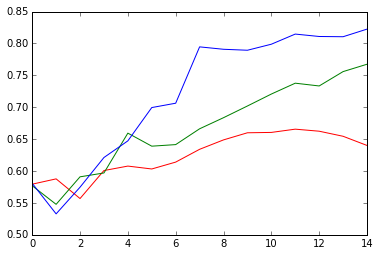

In [32]:
plt.plot(acc_list_rf_best_mean[0].mean(axis=0),c='r')
plt.plot(acc_list_rf_best_mean[1].mean(axis=0),c='g')
plt.plot(acc_list_rf_best_mean[2].mean(axis=0),c='b')


####sum

In [33]:
initial_size = 20
num_pic = 10
num_kmean_class = 20

num_loops =5
N=15
degree_list=[0.1, 0.2,0.4,0.6,0.8]
#degree_list=[0.2, 0.6,0.8,1.2]
#degree_list=[1.0]

num_deg = len(degree_list)
uncertainty_thred=1

acc_list_rf_best_sum = np.zeros((num_deg,num_loops,N))
time_cost_list_rf_best_sum = np.zeros((num_deg,num_loops,N))

In [34]:
begin = time.time()

for dk in xrange(num_deg):
    degree = degree_list[dk]
    print "degree= ", degree
    for j in xrange(num_loops):
        print "j= ",j
        Xsearch = Xsearch_copy
        ysearch = ysearch_copy 
        
        Xinit = Xinit_copy
        yinit = yinit_copy 
        
        Xt = Xt_copy
        yt = yt_copy 
        
        Xlabel = Xinit
        ylabel = yinit
        
        uncertainty_idx_list,uncertainty_score_list,acc_temp = get_uncertainty_by_ranfom_forest(Xinit,yinit,Xsearch,Xt,yt, uncertainty_thred=1)
        
        acc_list_rf_best_sum[dk,j,0] = acc_temp
        time_cost_list_rf_best_sum[dk,j,0] = 0

        # remain list (high certainty)
        Xre = np.delete(Xsearch,uncertainty_idx_list,0)
        yre = np.delete(np.array(ysearch),uncertainty_idx_list,0)

        for i in xrange(N-1):
            if i%20==0: print "i=", i
            if(Xsearch.shape[0] < num_kmean_class): break
            pca_data = PCA(n_components=10).fit_transform(Xsearch[:,:-5]) 
            diversity_label_list, center_list = kmeans_labels(pca_data,num_kmean_class)
            #print np.unique(diversity_label_list)

            
            data_dist_list = data_dist_2_center_normal(pca_data,diversity_label_list,center_list,num_kmean_class)

            pointing_table = pointing_by_object_whole_length_w_randomness(Xsearch,degree)
            
            cluster_obj_table, cluster_score_table = cluster_obj_and_score_tabel_sum(diversity_label_list,uncertainty_score_list,num_kmean_class)
            score_list = pointing_score_list(cluster_score_table,data_dist_list,pointing_table, diversity_label_list, uncertainty_score_list, Xsearch, mag_thred=0.85)
            
            #print score_list
            score_list_normalized, total_score_normalized,dom = score_normalization(score_list)
            first_pointing_idx = select_N_pointing_w_max(total_score_normalized, 1)
            
            combined_score_list = combined_pointing_score_list(Xsearch, pointing_table, first_pointing_idx, mag_thred=0.85)
            score_list_normalized, total_score_normalized,dom = score_normalization(combined_score_list)
            second_pointing_idx = select_N_pointing_w_max(total_score_normalized, 1)
            score_prev = total_score_normalized[second_pointing_idx][0]
            idx_prev = [first_pointing_idx[0], second_pointing_idx[0]]
            
            idx_new,score_new,time_new = simulating_annealing(dom, Xsearch,idx_prev,score_prev,pointing_table,10.0, 0.95, 10,1000)
            
            selected_obj_list = np.unique(pointing_table[idx_new[0]]+pointing_table[idx_new[1]])
            
            X_selected = Xsearch[selected_obj_list]
            y_selected = ysearch[selected_obj_list]

            Xlabel = np.vstack((Xlabel,X_selected))   
            ylabel = np.append(ylabel,y_selected)

            Xsearch = np.delete(np.array(Xsearch),selected_obj_list,0)
            ysearch = np.delete(np.array(ysearch),selected_obj_list,0)
            if(Xsearch.shape[0] < num_kmean_class): break


            uncertainty_idx_list,uncertainty_score_list,acc_temp = get_uncertainty_by_ranfom_forest(Xlabel,ylabel,Xsearch,Xt,yt, uncertainty_thred=1)
            acc_list_rf_best_sum[dk,j,i+1] = acc_temp
            time_cost_list_rf_best_sum[dk,j,i+1] = time_new
            
            
print 'Time Elapsed:', time.time()-begin 

degree=  0.1
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.2
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.4
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.6
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
degree=  0.8
j=  0
i= 0
j=  1
i= 0
j=  2
i= 0
j=  3
i= 0
j=  4
i= 0
Time Elapsed: 234.386622906


In [35]:
data_dist_list = data_dist_2_center_normal(pca_data,diversity_label_list,center_list,num_kmean_class)

In [36]:
for j in xrange(num_deg):
    for k in xrange(num_loops):
        for i in xrange(N):
            if(acc_list_rf_best_mean[j,k,i]!= 0):
                temp = acc_list_rf_best_mean[j,k,i]
            if(acc_list_rf_best_sum[j,k,i]!= 0):
                temp = acc_list_rf_best_sum[j,k,i]
                
        for i in xrange(N):
            if(acc_list_rf_best_mean[j,k,i] == 0):
                acc_list_rf_best_mean[j,k,i] = temp
            if(acc_list_rf_best_sum[j,k,i] == 0):
                acc_list_rf_best_sum[j,k,i] = temp

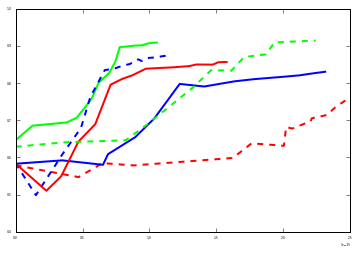

In [61]:
plt.plot(time_cost_list_rf_best_sum[0].mean(axis=0).cumsum()*3.9,acc_list_rf_best_sum[0],label = "FOV=0.5", ls = "-", c="lime",linewidth =2)
plt.plot(time_cost_list_rf_best_sum[1].mean(axis=0).cumsum()*3.9,acc_list_rf_best_sum[1].mean(axis=0),label = "FOV=0.5", ls = "--", c="r",linewidth =2)
plt.plot(time_cost_list_rf_best_sum[2].mean(axis=0).cumsum()*3.9,acc_list_rf_best_sum[2].mean(axis=0),label = "FOV=1", ls = "--", c="b",linewidth =2)
plt.plot(time_cost_list_rf_best_mean[0].mean(axis=0).cumsum()*3.9,acc_list_rf_best_mean[0].mean(axis=0),label = "FOV=1", ls = "-", c="b",linewidth =2)
plt.plot(time_cost_list_rf_best_mean[1].mean(axis=0).cumsum()*3.9,acc_list_rf_best_mean[1].mean(axis=0),label = "FOV=0.5", ls = "-", c="r",linewidth =2)
plt.plot(time_cost_list_rf_best_mean[2].mean(axis=0).cumsum()*3.9,acc_list_rf_best_mean[2],label = "FOV=1", ls = "--", c="lime",linewidth =2)



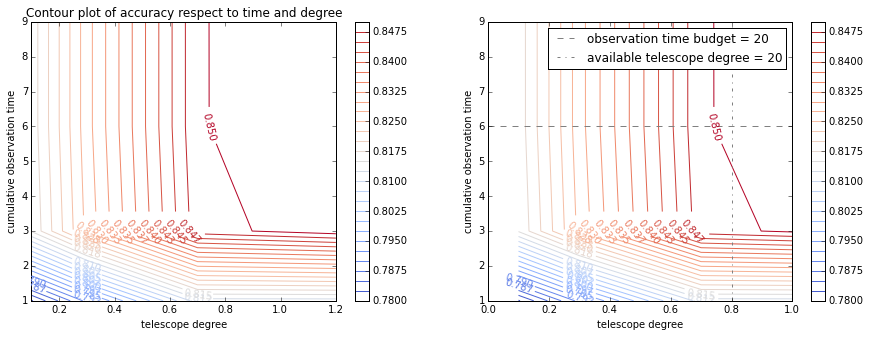

In [279]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
CS=plt.contour(X,Y, Z,32,cmap=cm.coolwarm)
plt.clabel(CS, inline=1, fontsize=10)

plt.xlabel("telescope degree")
plt.ylabel("cumulative observation time")
plt.title("Contour plot of accuracy respect to time and degree")
plt.colorbar(CS)

plt.subplot(1,2,2)
CS=plt.contour(X,Y, Z,32,cmap=cm.coolwarm)
plt.clabel(CS, inline=1, fontsize=10)
plt.axhline(y=6, color = 'grey', ls = 'dashed',label = "observation time budget = 20")
plt.axvline(x=0.8, color = 'grey', ls = '-.',label = "available telescope degree = 20")
plt.colorbar(CS)

plt.xlabel("telescope degree")
plt.ylabel("cumulative observation time")
plt.xlim([0,1])
plt.legend(loc=1)
plt.show()
